<a href="https://colab.research.google.com/github/AdityaGhatty/Datascience/blob/main/Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

Polynomials help capture non-linear patterns and improve accuracy by letting curves in the data.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

High degrees can overfit data and reduce generalization. Increasing model complexity can make interpretation harder and higher variance.

**Task3**:

What's the point of using b splines?

B splines allow for flexibility curve fitting while  being efficient. They allow local control, which is adjusting separate regions without messing with the whole function. Theyre good for complex modeliing and nonlinear relationships.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

It's like taking a b spline but chop-chopped into max amount of pieces, so instead of comparing regions to each other you compare every single point to every single other point so you get ALL possible relations. Perfect model

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [ ]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-atxt9l_d
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-atxt9l_d
  Resolved https://github.com/pydata/xarray.git to commit 4bbab48cacf94ff285475bd7b7abeea3b2ea888f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev16+g4bbab48c-py3-none-any.whl size=1255523 sha256=434aa8c3ad7c93ccf8ab268a7faab2e72f0b963c8b7198a293c6c9198176e8c8
  Stored in directory: /tmp/pip-ephem-wheel-cache-sva1eayw/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.7 MB/s eta 0:00:00
   ━

In [ ]:
howell =  pd.read_csv("https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/howell.csv")

In [ ]:
formula_howell=bmb.Formula("weight ~ poly(height, 3)", "sigma  ~ height")
model_dis = bmb.Model(formula_howell, howell)
idata_dis=model_dis.fit(idata_kwargs={"log_likelihood":True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


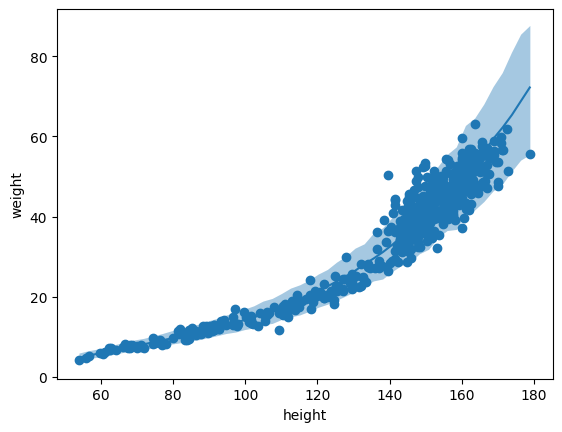

In [ ]:
bmb.interpret.plot_predictions(model_dis, idata_dis, "height", pps=True)
plt.plot(howell.height.values, howell.weight.values, 'o', zorder=-3)

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

I learned that when no mean function is given, the GP assumes a mean of zero, which can lead to unrealistic forecasts where the function eventually returns to zero over time. This shows the importance of choosing an appropriate mean function, such as a piecewise linear function with changepoints, to better model trends like CO2 levels.

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

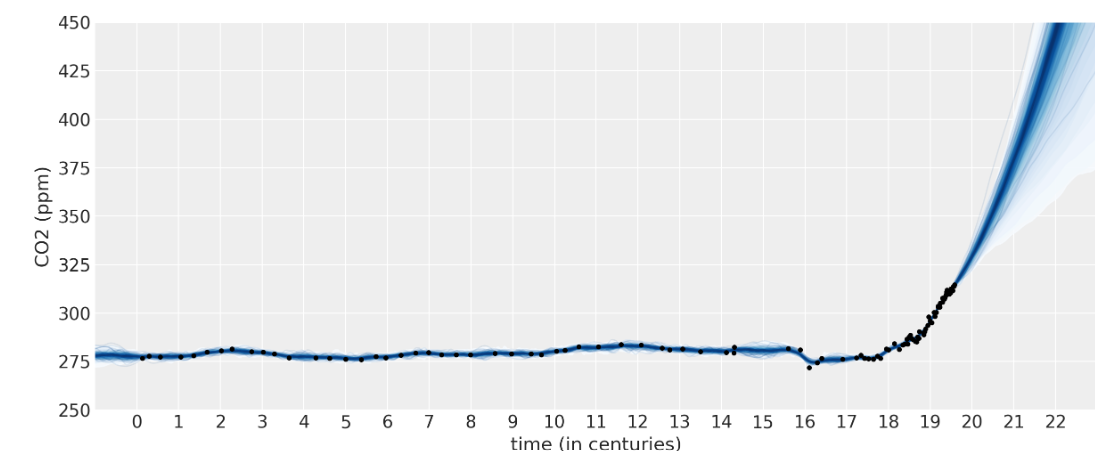


This way my favorite graph because it's kind of cool to see like a normal line and then see how the graph models like a separate trend during it, with solid accuracy. Very cool to think about, and I like the colors.